# Data Science in Python: Review

* NumPy
* Pandas
* Seaborn/Plotly
* Sklearn

### Examples

* Loan Default Rate ($y$) from Customer Credit Details ($X$)
* Road Accident Rate ($y$) from Weather ($X$)
* Global Temp ($y$) vs CO<sub>2</sub> ($X$)
* Life Expectancy ($y$) vs. Location ($X$)

---

## Simulating Time Series

In [5]:
import numpy as np

In [140]:
N = 100

x0 = np.linspace(300, 500, num=N) 


<AxesSubplot:>

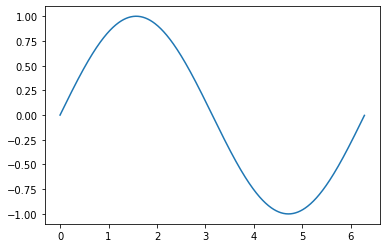

In [23]:
x_test = np.arange(0, 2 * np.pi, 0.01)

sns.lineplot(x=x_test, y=np.sin(x_test))

<AxesSubplot:>

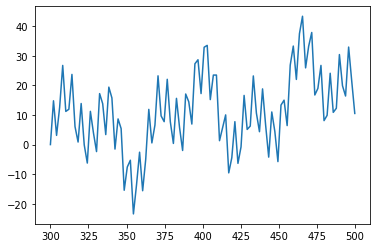

In [42]:
%matplotlib inline
import seaborn as sns

base_uk = 0

seasonal_uk = np.sin((x0 - 300)/12) + base_uk
monthly_uk = np.sin((x0 - 300)/5)
daily_uk = np.sin((x0 - 300))

co2_uk = (x0-300)/100

y_co2 = 10*(seasonal_uk + monthly_uk +co2_uk + daily_uk)

sns.lineplot(x=x0, y= y_co2)

---

## Simulating Accidents

* $y$ Accidents/Month UK
* $X$ Weather

In [52]:
uk_avg_rain = 133/365
uk_avg_windspeed = 9.5 #mph
uk_avg_temp = 14 # C


In [61]:
x0_rain = np.random.choice([1, 0], size=N, p=[uk_avg_rain, 1-uk_avg_rain])
x1_wind = np.random.normal(uk_avg_windspeed, 5, size=N) + 5
x2_temp = np.random.normal(uk_avg_temp, 5, size=N) 


In [62]:
x1_wind[x1_wind < 0]

array([], dtype=float64)

In [63]:
x2_temp[x2_temp < 0 ]

array([], dtype=float64)

In [67]:
X = np.column_stack((x0_rain, x1_wind, x2_temp)).round(2)

In [68]:
X[:2]

array([[ 1.  ,  9.76, 14.02],
       [ 1.  , 10.32, 10.65]])

In [85]:
X[:, 1].max(), X[:, 2].max()

(30.14, 22.7)

In [131]:
baseline = 25_000

y = 10000 * (3*X[:, 0]/3 + X[:, 1]/(3 * 100) - 1.5*X[:, 2]/(3 * 100)) + baseline

y += np.random.normal(0, 2_500, size=N)

In [132]:
y.min(), y.max()

(19095.58802448651, 41053.87739738861)

In [133]:
df = pd.DataFrame(X, columns=['Rain', 'WindSpeed', 'Temp'])
df['NumAccidents'] = y.round()

In [134]:
df

,Rain,WindSpeed,Temp,NumAccidents
0,1.0,9.76,14.02,35135.0
1,1.0,10.32,10.65,32355.0
2,0.0,15.38,15.29,23260.0
3,0.0,16.46,13.32,26941.0
4,0.0,11.26,7.62,22825.0
...,...,...,...,...
95,0.0,20.74,0.65,20721.0
96,0.0,15.29,9.10,25212.0
97,0.0,20.38,14.05,21047.0
98,1.0,10.62,14.44,32288.0


<AxesSubplot:xlabel='Rain', ylabel='NumAccidents'>

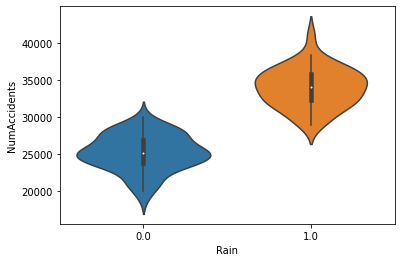

In [135]:
sns.violinplot(y=df['NumAccidents'], x=df['Rain'])

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
model = LinearRegression().fit(
    df[['Rain', 'WindSpeed', 'Temp']], df['NumAccidents']
)

In [138]:
model.coef_, model.intercept_

(array([ 8.79947567e+03, -2.08339972e+00, -2.37907551e+01]), 25559.76310501034)

In [139]:
model.score(X, y)

0.7503111639290612